In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neuron import h

In [2]:
%%capture
!rm -rf x86_64
!nrnivmodl ./mechanisms

In [3]:
hoc = 'Cell_2.hoc'
name = hoc.split('.')[0]

h.load_file("stdrun.hoc")
h.load_file(hoc)

cmd = 'h.%s("./morphology/", "AB5_porta76_cel2.swc")' % name
cell = eval(cmd)

In [4]:
celsius = 35.0
v_init = -86.0
holding_current = 0.1558
stimulus = 0.4241
delay = 700.0
duration = 2000.0
simtime = 3000.0

In [5]:
stim1  = h.IClamp(cell.soma[0](0.5))
stim1.amp = holding_current
stim1.delay = 0.0
stim1.dur = simtime

stim2 = h.IClamp(cell.soma[0](0.5))
stim2.amp = stimulus
stim2.delay = delay
stim2.dur = duration

In [6]:
time = h.Vector()
time.record(h._ref_t)

volt = h.Vector()
volt.record(cell.soma[0](0.5)._ref_v);

In [7]:
h.v_init = v_init
h.celsius = celsius
h.tstop = simtime
cvode = h.CVode()
cvode.active(1)
h.run();

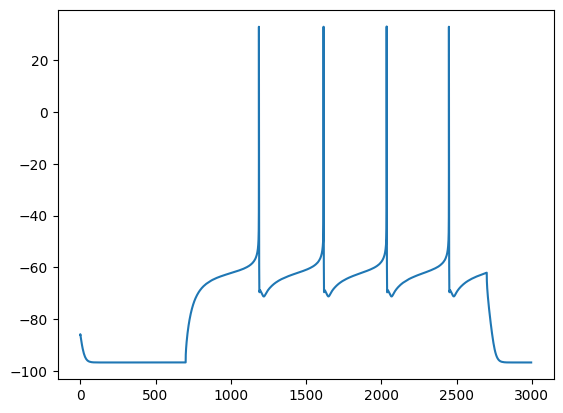

In [8]:
plt.plot(time, volt);